In [80]:
import numpy as np
class ObstacleMap:
    def __init__(self, x_start, y_start, x_target, y_target, max_x, max_y, obstacle_ratio):
        self.x_start = x_start
        self.y_start = y_start
        self.x_target = x_target
        self.y_target = y_target        
        self.max_x = max_x
        self.max_y = max_y
        self.obstacle_ratio = obstacle_ratio
        
    def creata_obstacles(self):
        obstacle_map = []
        rand_map = np.random.rand(self.max_x, self.max_y)
        for i in range(0, self.max_x):
            for j in range(0, self.max_y):
                if rand_map[i,j]<self.obstacle_ratio:
                    obstacle_map.append([i,j])
        return obstacle_map
          
    def create_map(self):
        whole_map = []
        whole_map.append([self.x_start, self.y_start])
        whole_map.extend(self.creata_obstacles())
        whole_map.append([self.x_target, self.y_target])
        return whole_map
        

In [81]:
map = ObstacleMap(1,1,10,10,10,10,0.25)

In [82]:
whole_map = map.create_map()
whole_map

[[1, 1],
 [0, 0],
 [0, 5],
 [0, 6],
 [0, 7],
 [2, 1],
 [3, 8],
 [4, 0],
 [5, 3],
 [5, 8],
 [6, 4],
 [6, 6],
 [7, 2],
 [8, 9],
 [9, 0],
 [9, 7],
 [10, 10]]

In [17]:
whole_map[1]

[0, 9]

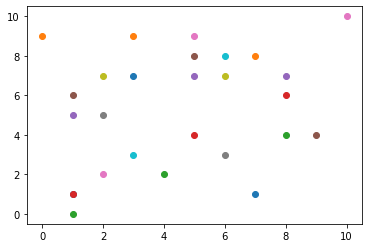

In [19]:
import matplotlib.pyplot as plt
for i in range(0, len(whole_map)):
    plt.scatter(whole_map[i][0], whole_map[i][1])

In [76]:
import math
def node_distance(x1, y1, x2, y2):
    return math.sqrt(math.pow((x1-x2),2)+math.pow((y1-y2),2))
    

In [24]:
node_distance(1,1,4,5)

5.0

In [31]:
def insert_open(x_val, y_val, parent_xval, parent_yval, hn, gn, fn):
    new_node = []
    new_node.insert(0,1)
    new_node.insert(1,x_val)
    new_node.insert(2,y_val)
    new_node.insert(3,parent_xval)
    new_node.insert(4,parent_yval)
    new_node.insert(5,hn)
    new_node.insert(6,gn)
    new_node.insert(7,fn)
    return new_node

In [46]:
new_node = insert_open(22,23,4,5,6,7,8)
new_node

[1, 22, 23, 4, 5, 6, 7, 8]

In [37]:
open_list = []
open_list.append(new_node)

In [47]:
open_list.append(new_node)
open_list

[[1, 2, 3, 4, 5, 6, 7, 8],
 [1, 12, 13, 4, 5, 6, 7, 8],
 [1, 22, 23, 4, 5, 6, 7, 8]]

In [60]:
def node_indx(open_list, x_val, y_val):
    n_index = -1
    for i in range(0, len(open_list)):
        if open_list[i][1] == x_val and open_list[i][2] == y_val:
            n_index = i
    
    return n_index

In [61]:
node_indx(open_list,32,33)

-1

In [62]:
new_node = insert_open(22,23,4,5,6,7,8)
new_node


[1, 22, 23, 4, 5, 6, 7, 8]

In [63]:
closed_list = []

In [64]:
closed_list.append(new_node)
closed_list

[[1, 22, 23, 4, 5, 6, 7, 8]]

In [67]:
def is_in_closed_list(closed_list, x_val, y_val):
    is_in = False
    for i in range(0,len(closed_list)):
        if closed_list[i][0] == x_val and closed_list[i][1] == y_val:
            is_in = True
    return is_in

In [69]:
is_in_closed_list(closed_list, 12,13)

False

In [75]:
def hn_Astar(xTarget, yTarget, exp_x, exp_y):
    return node_distance(xTarget, yTarget, exp_x, exp_y)

In [78]:
def expand_list(node_x, node_y, gn, xTarget, yTarget, closed_list, MAX_X, MAX_Y):
    expand_list = []
    list_order = [1,0,-1]
    for i in list_order:
        for j in list_order:
            expand_node = []
            if i==0 and j==0:
                continue
            exp_x = node_x + i
            exp_y = node_y + j
            if exp_x >=0 and exp_x < MAX_X and exp_y >=0 and exp_y < MAX_Y and (not is_in_closed_list(closed_list, exp_x, exp_y)):
                expand_node.insert(0,exp_x)
                expand_node.insert(1,exp_y)
                expand_node.insert(2,hn_Astar(xTarget, yTarget, exp_x, exp_y)) #fn
                expand_node.insert(3,gn+node_distance(node_x, node_x, exp_x, exp_y)) #gn
                expand_node.insert(4,expand_node[2]+expand_node[3]) #hn
                expand_list.append(expand_node)
            
    return expand_list
             
                
                

In [79]:
expand_list(0,0,0,9,9,[],9,9)

[[1, 1, 11.313708498984761, 1.4142135623730951, 12.727922061357857],
 [1, 0, 12.041594578792296, 1.0, 13.041594578792296],
 [0, 1, 12.041594578792296, 1.0, 13.041594578792296]]

In [ ]:
def min_fn(open_list, xTarget, yTarget):
    fn = 1000
    for i in range(0, len(open_list)):
        if open_list[i][-1] < fn:
            fn = open_list[i][-1]
            node_selected = open_list[i]
            
    return node_selected
        

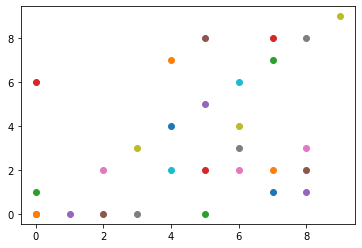

IndexError: list index out of range

In [92]:
from utils import ObstacleMap, insert_open, expand_list, min_fn
import matplotlib.pyplot as plt

x_node = 0
y_node = 0
gn = 0
x_target = 9
y_target= 9
MAX_X = 9
MAX_Y = 9

map = ObstacleMap(x_node, y_node, x_target, y_target, MAX_X, MAX_Y, 0.25)
whole_map = map.create_map()
for i in range(0, len(whole_map)):
    plt.scatter(whole_map[i][0], whole_map[i][1])
plt.show()

closed_list = whole_map

#for loop in range(0, 10000):
exp_list = expand_list(x_node, y_node, gn, x_target, y_target, closed_list, MAX_X, MAX_Y)
print(exp_list)

In [102]:
l = [1,1]
list = []
l2 = [2,2]
l3 = [3,3]


In [105]:
list.append(l3)
list

[[1, 1], [2, 2], [3, 3]]

In [106]:
list[0][0] = 0

In [107]:
list

[[0, 1], [2, 2], [3, 3]]

In [2]:
class person(object):
    tall=180
    hobbies=[]
    __private_name = "xx"
    def __init__(self,name,age,weight):
        self.name=name
        self.age=age
        self.weight=weight
        self.__private_name = "123"
    def __init__(self):
        return
    def information(self):
        self.tall
        print("%s age is %d ,and weigth is %s"%(self.name,self.age,self.weight))

person.hobbies.extend(["football","woman"]) #类数据属性属于类本身，可以通过类名进行修改和访问，此次添加两个值
print("person hobbies list is:%s"%person.hobbies)
person.hobbies2=["reading","swimming","running"] #类在定义后，依然可以添加类的属性，新增的类属性也可以被类和所以实例共有
print("person hobbies2 list is:%s"%person.hobbies2)
print(dir(person)) #通过内建函数dir()或访问类的字典属性__dict__这两种方式来查看类有那些属性


jhon=person("jhon",24,66) #实例数据属性只能通过实例化访问
jhon.gender="man"  #类实例化后可以动态添加属性，但是只能被实例化的jhon使用
print("%s gender is %s"%(jhon.name,jhon.gender))
print(dir(jhon))
jhon.hobbies.append("python") #修改实例化列表属性，在原基础上添加
infoma=jhon.information()
print(infoma)
print(jhon.hobbies)
print(jhon.hobbies2)

jhon2=person("jhon2",25,68) #jhon2将没有属性gender
print(jhon2.__dir__())

person hobbies list is:['football', 'woman']
person hobbies2 list is:['reading', 'swimming', 'running']
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'hobbies', 'hobbies2', 'information', 'tall']
jhon gender is man
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'age', 'gender', 'hobbies', 'hobbies2', 'information', 'name', 'tall', 'weight']
jhon age is 24 ,and weigth is 66
None
['football', 'woman', 